<a href="https://colab.research.google.com/github/Avinash-Saudagar/AirBnb-Analysis/blob/main/Avinash_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
path = '/content/drive/MyDrive/AlmaBetter/Capstone Project/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
df_airbnb = pd.read_csv(path)

In [186]:
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [187]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [188]:
df_airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [189]:
df_airbnb['neighbourhood'].nunique()

221

In [190]:
df_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#Let's do the analysis step by step!

In [191]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

top_host = df_airbnb.host_id.value_counts().head(10)
top_host.reset_index()

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [192]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'

top_host_check = df_airbnb.calculated_host_listings_count.max()
top_host_check

327

In [193]:
df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'host_id','host_id':'count'},inplace=True)

In [194]:
df_top_host

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

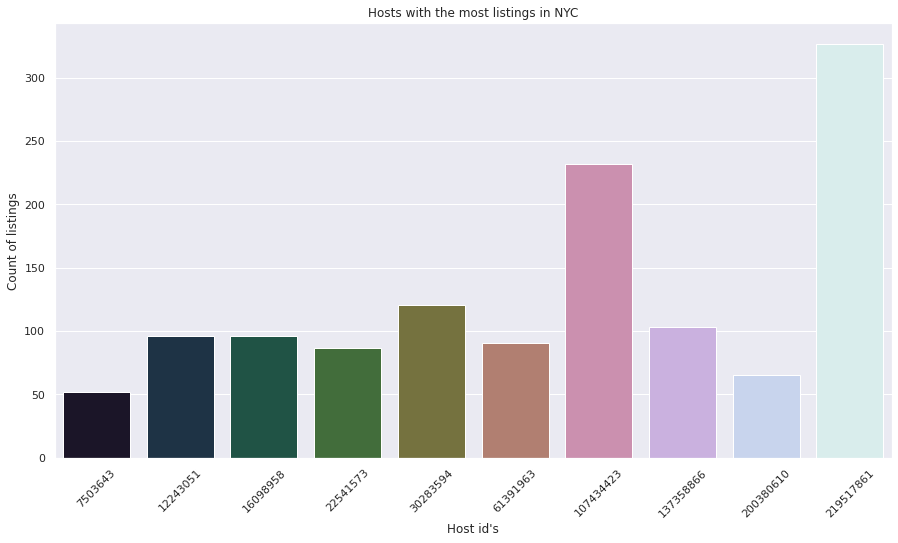

In [195]:
#setting figure size
plt.figure(figsize=(15,8))

viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="cubehelix")
viz.set_title('Hosts with the most listings in NYC')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host id\'s')
viz.set_xticklabels(viz.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

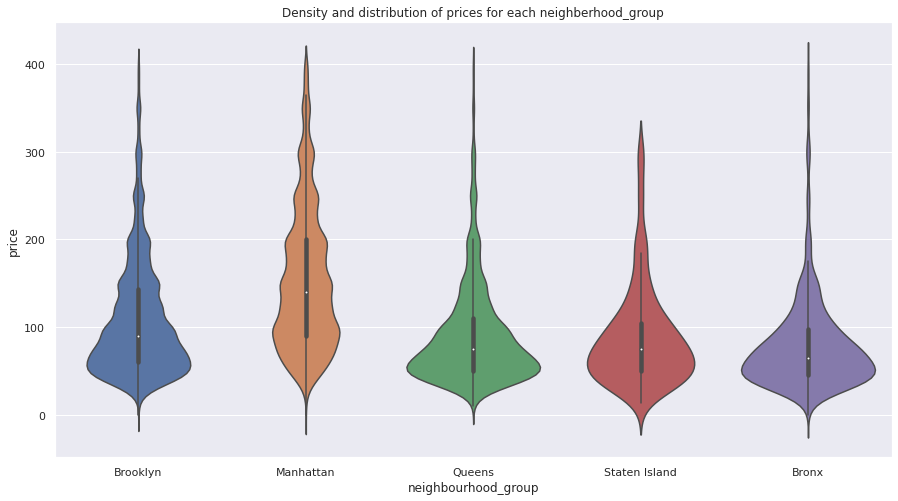

In [196]:
#creating a sub-dataframe with no extreme values / less than 400

price_less_than_400 = df_airbnb[df_airbnb['price'] < 400]

#setting figure size
plt.figure(figsize=(15,8))

#using violinplot to showcase density and distribtuion of prices 
viz2 = sns.violinplot(data=price_less_then_400,x='neighbourhood_group',y='price')
viz2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

Let's check the **correlation** matrix to understand how are the features interrelated with each other.<br> 

Also to get an idea which are the most important features in this data.

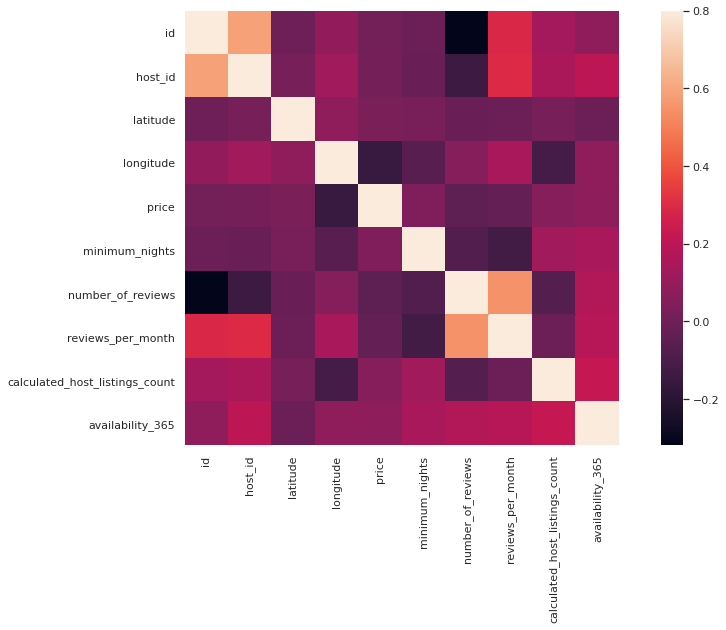

In [200]:
#correlation matrix
plt.figure(figsize=(15,8))
corrmat = df_airbnb.corr()
sns.heatmap(corrmat, vmax=.8, square=True);



Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing. <br>

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. <br>

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Let's check the most no of listings in NYC first!**



In [201]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_airbnb['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home

In [202]:
top_10_hosts=df_airbnb['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!

In [203]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC')

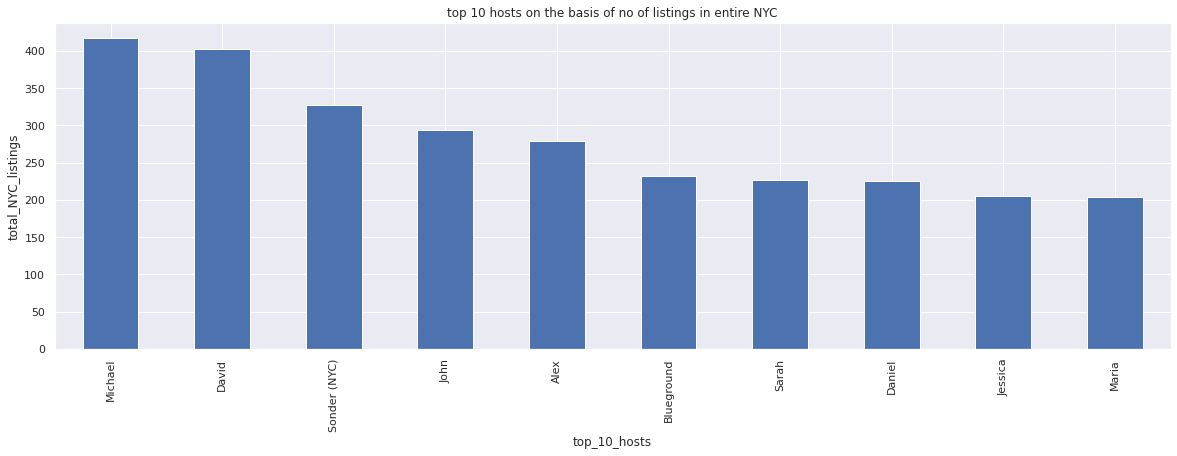

In [204]:
top_10_hosts.plot(kind='bar',color='b')
plt.xlabel('top_10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group')

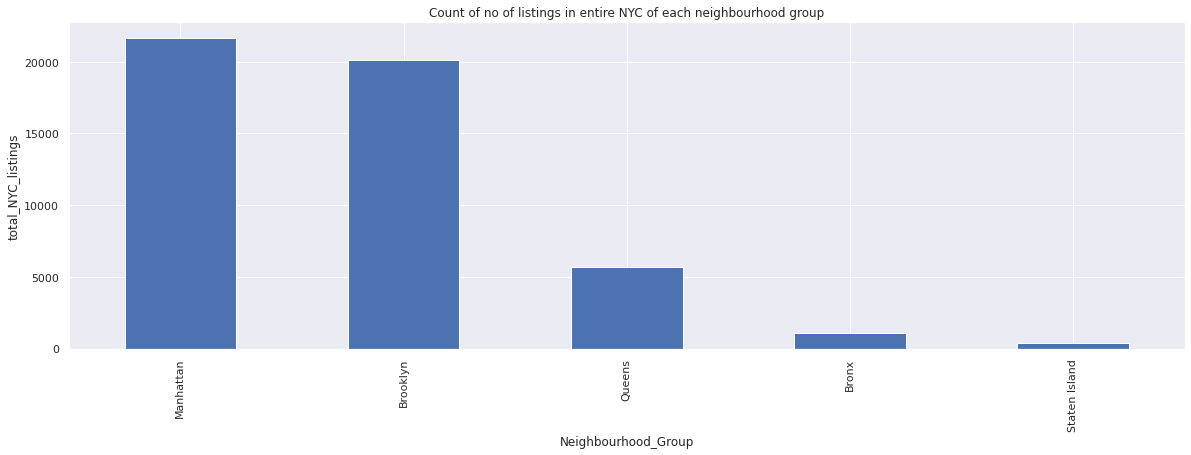

In [205]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods 
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group')

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

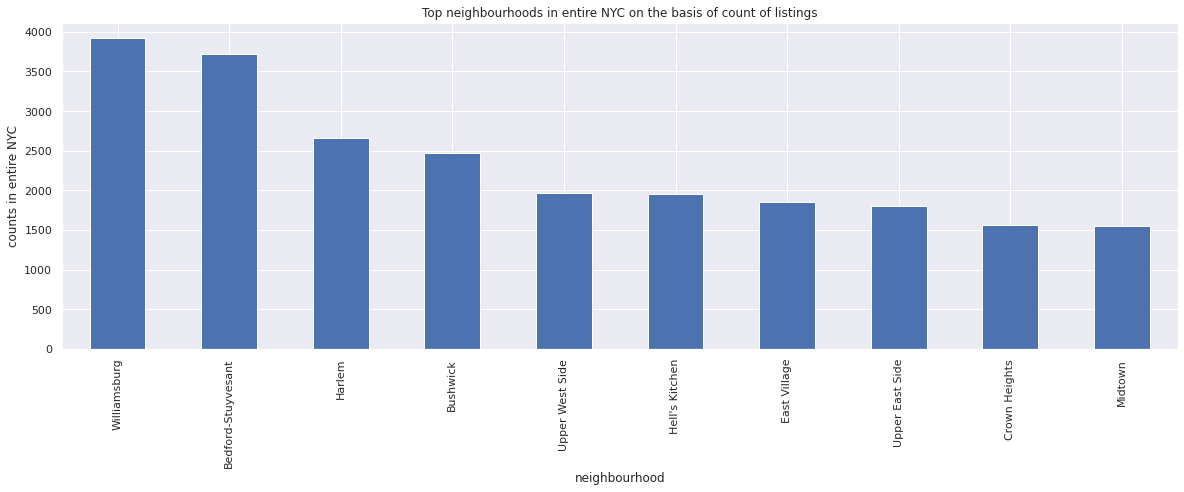

In [206]:
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='b')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

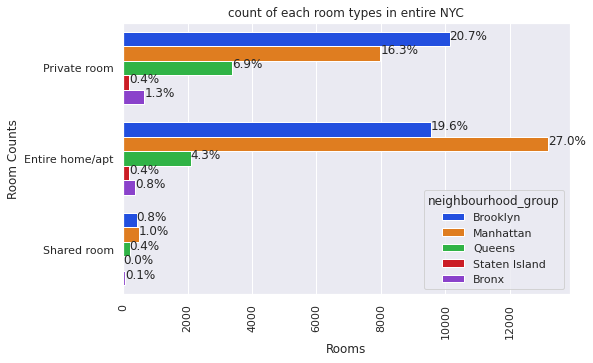

In [207]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_airbnb,palette='bright')

total = len(df_airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# **Let's look at the distribution of the listings with availability**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


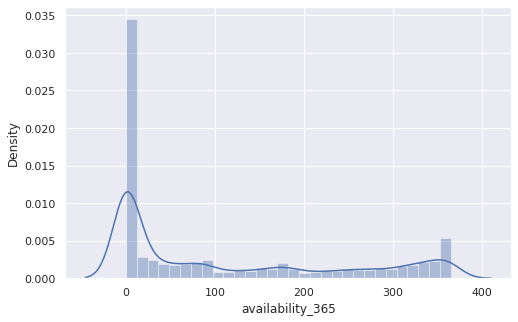

In [208]:
#distribution of listings availability at NYC!
sns.distplot(df_airbnb['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

Reviews/month distribution as per listings in NYC

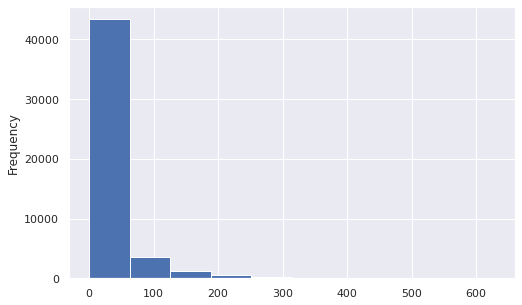

In [238]:
df_airbnb['number_of_reviews'].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


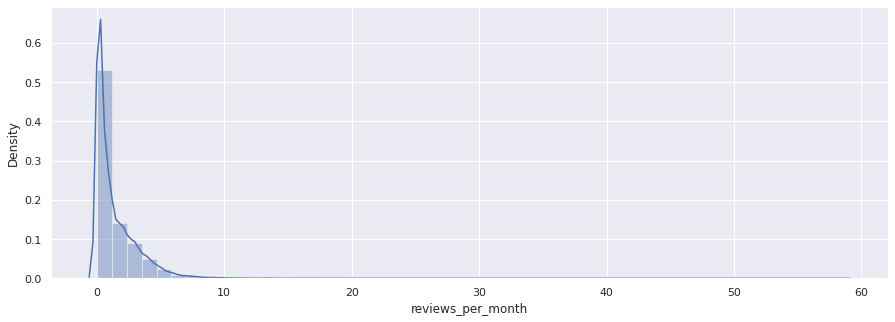

In [239]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_airbnb['reviews_per_month'])

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest

In [240]:
#skewness and kurtosis
print("Skewness: %f" % df_airbnb['reviews_per_month'].skew())
print("Kurtosis: %f" % df_airbnb['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.130189
Kurtosis: 42.493469


# **Bi-variate Analysis**

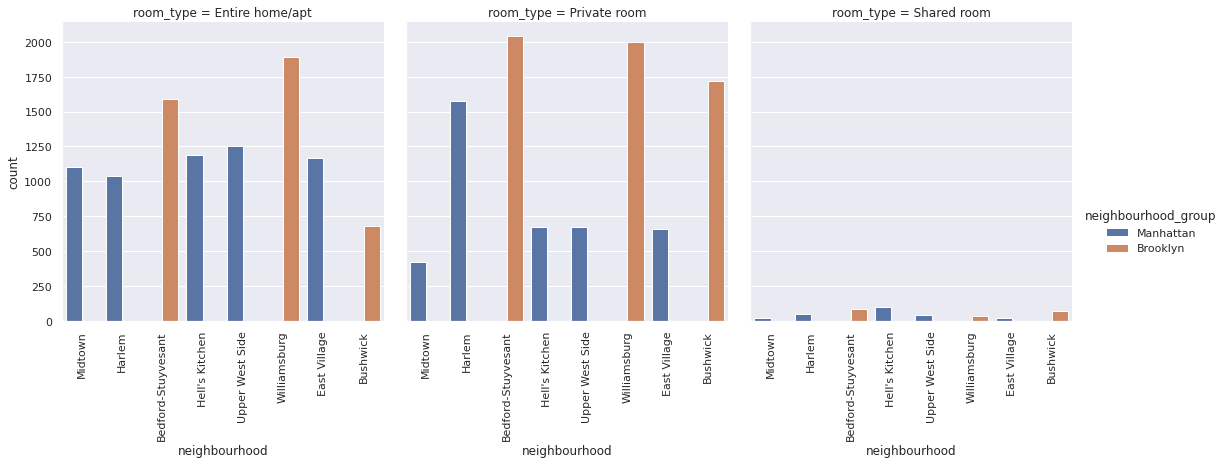

In [209]:
#grabbing top 10 neighbourhoods for sub-dataframe

sub_data = df_airbnb[df_airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                              'Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side''Crown Heights','Midtown'])]

viz3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_data , kind='count')
viz3.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


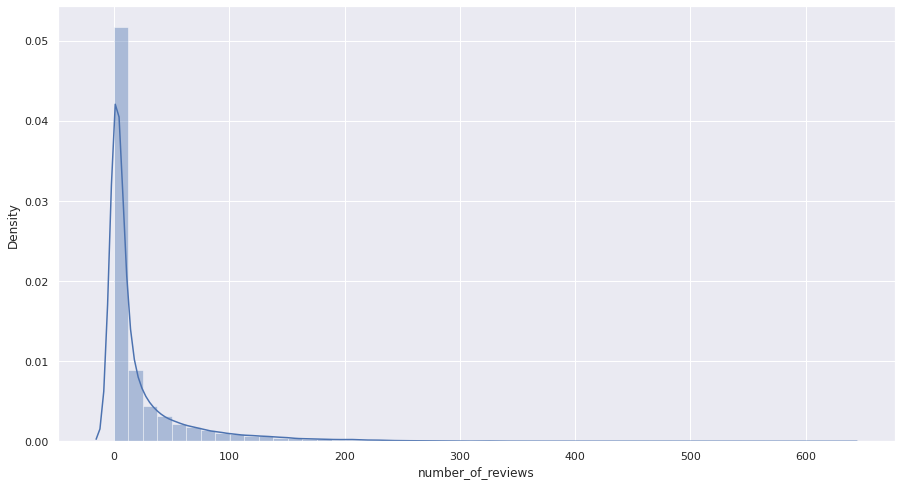

In [211]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df_airbnb['number_of_reviews'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1e260ab4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1e260b04d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1e260b6510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1e260b0f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1e260aba10>,
  <matplotlib.lines.Line2D at 0x7f1e260abf50>]}

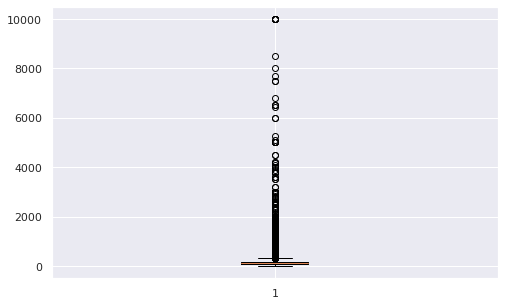

In [212]:
plt.boxplot(df_airbnb['price'])

In [213]:
df_airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group. <br>

We can do a seaborn point plot to get the average prices/neighbourhood in NYC! 

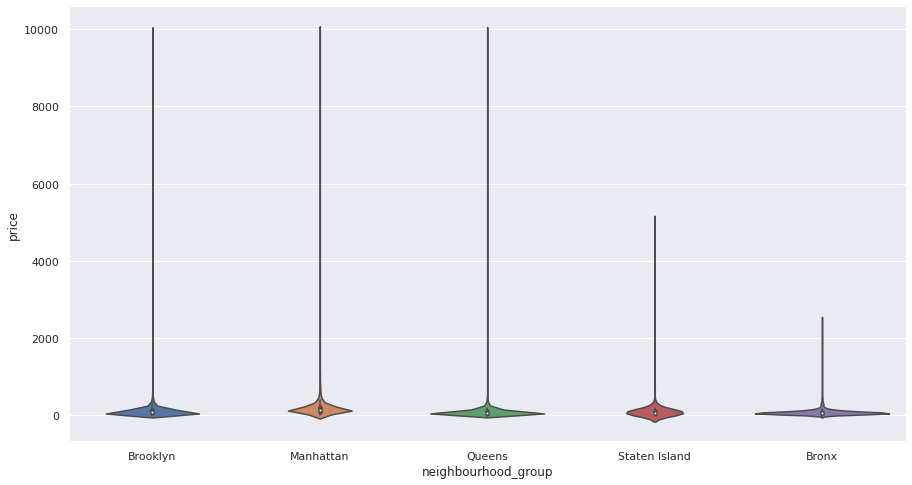

In [237]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = df_airbnb)

As usual Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings. <br>

Queens, Staten Island are on the same page with price on listings.

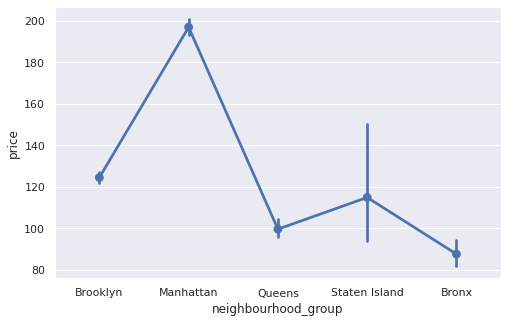

In [215]:
sns.pointplot(x ='neighbourhood_group',y = 'price',data = df_airbnb, estimator = np.mean)

We can see that **Manhattan** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn** <br> 

**Queens** and **Staten Island** have same average price/day, while **Bronx** comes out to be the cheapest neighbourhood group in NYC.

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

# **Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!**

In [216]:
df_airbnb.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room


Looks like the all the top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

In [217]:
df_airbnb.sort_values(by = 'price', ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,Kimberly,Private room


Also, the cheapest listings mostly comes from **Brooklyn**, **Queens** and all are private rooms which makes sense. 

***#Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:***

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [218]:
df_airbnb.groupby(['neighbourhood_group',	'neighbourhood'])['price'].mean().reset_index().sort_values(by = 'price',ascending=False)[:5]

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
220,Staten Island,Woodrow,700.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Sea Gate**, origins from **Staten Island** & **Brooklyn**. <br>

**Riverdale** from **Bronx** and **Tribeca** from **Manhattan**. **Neponsit** from **Queens**. 

In [219]:
# df_airbnb.plot(x ='neighbourhood', rot = 90, title = 'Top Neighbourhoods in each neighbourhood groups in NYC',kind = 'bar')

# Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:

In [220]:
#costliest listings in each neighbourhood groups
costliest_df= df_airbnb.loc[df_airbnb.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [221]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Queens,Kathrine,10000
22353,Victorian Film location,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Bronx,Kathy,2500


Looks like the top 2 costliest listings: **LUXURIOUS 5 bedroom, 4.5 bath home** & **Park Place Townhouse** were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

**Also, the cheapest listings in each neighbourhood groups & their respective hosts:**

In [222]:
#cheapest listings in each neighbourhood groups
cheapest_df = df_airbnb.loc[df_airbnb.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [223]:
cheapest_df.sort_values(by = 'price',ascending = True)

,neighbourhood_group,name,host_name,price
25433,Bronx,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,0
23161,Brooklyn,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,0
26259,Manhattan,the best you can find,Qiuchi,0
22835,Queens,IT'S SIMPLY CONVENIENT!,Maria,10
45646,Staten Island,Happy Home 3,Raquel,13


Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

# Room_types vs price on different neighbourhood groups!

In [224]:
df_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

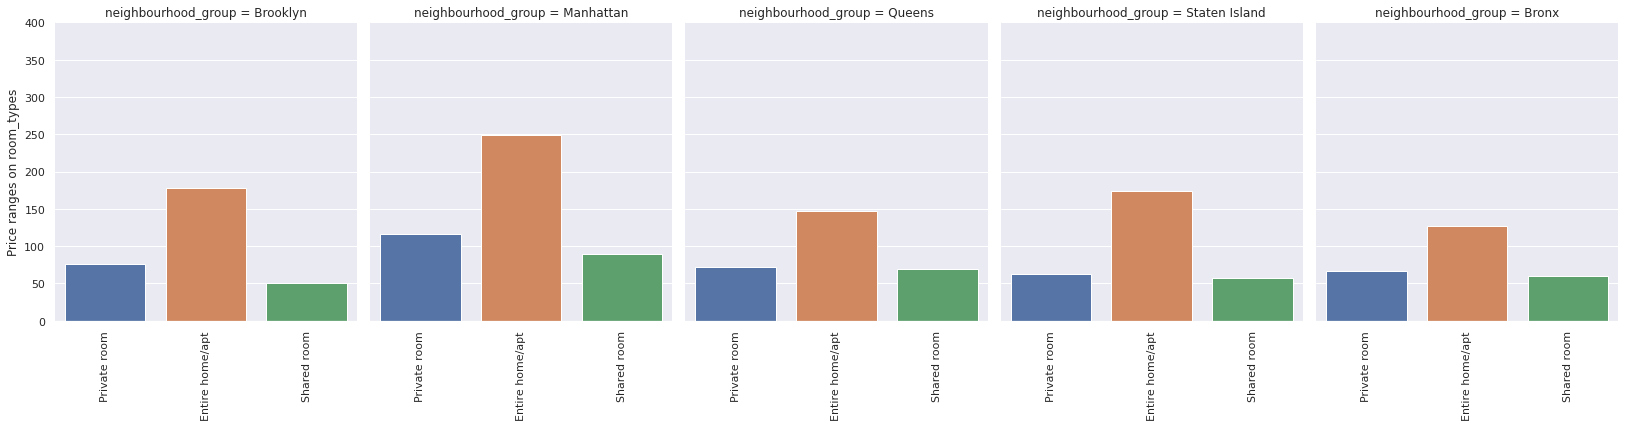

In [225]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_airbnb, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

Looks like a property/listing with **Entire home/apt** as room_type wins the show at NYC followed by private rooms. <br>

**Manhattan** has the highest price for room types with **Entire home/apt**  ranging to nearly 240 USD/night, followed by **Private room** with 110 USD/night. And it's obvious being the most expensive place to live in!

# On an average for how many nights people stayed in each room_types!

Text(0, 0.5, 'Room types')

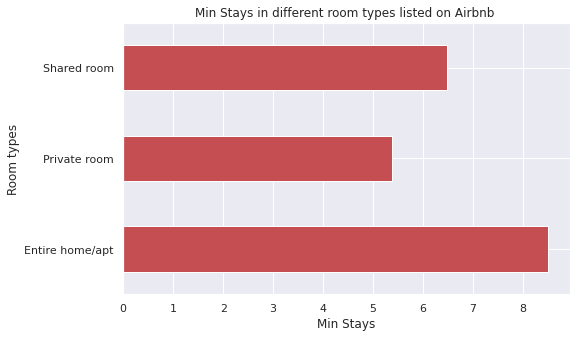

In [226]:
# min_night= df_air_pnw['room_type']
df_airbnb.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Min Stays')
plt.ylabel('Room types')
# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of more than **8 nights** followed by guests who stayed in **shared room** where average stay is **6-7 nights**.

# Let's play around with the reviews on listings in NYC!

In [227]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford. 

**Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

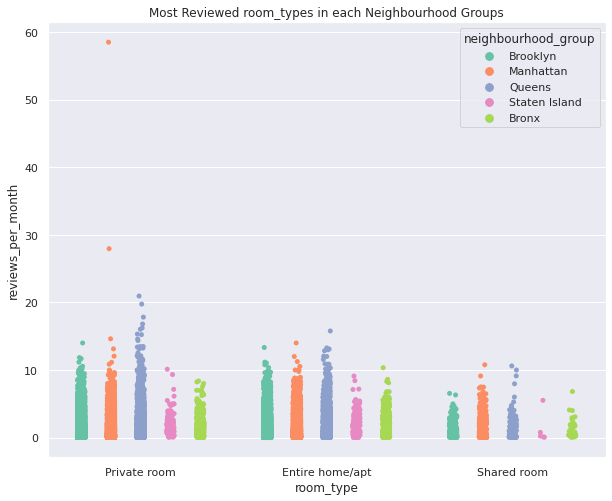

In [228]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_airbnb,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase. <br>

Manhattan & Queens got the most no of reviews for Entire home/apt room type. <br>

There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

**Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

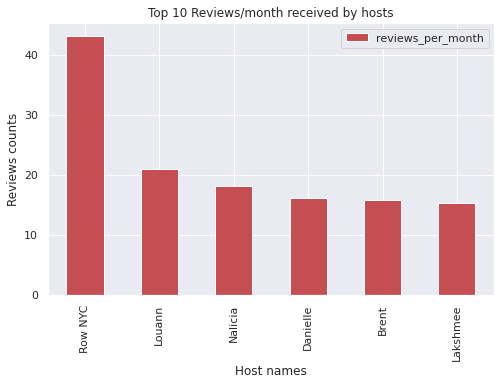

In [229]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.

# Hosts with most no of listings in NYC(on the basis of host listings count):

In [230]:
host_with_most_listings= df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216


So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.

We can also check for **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

# Room_types and their relation with availability in different neighbourhood groups!

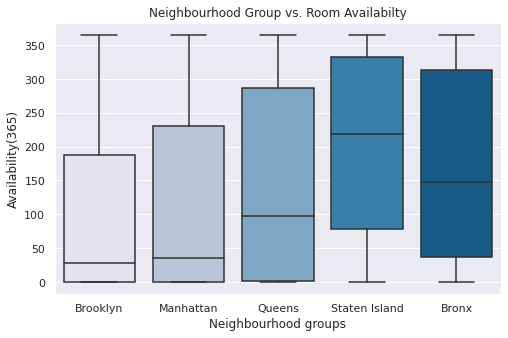

In [231]:
sns.boxplot(x = 'neighbourhood_group', y= 'availability_365', data = df_airbnb, palette = 'PuBu')
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

Text(0.5, 1.0, 'Location Co-ordinates')

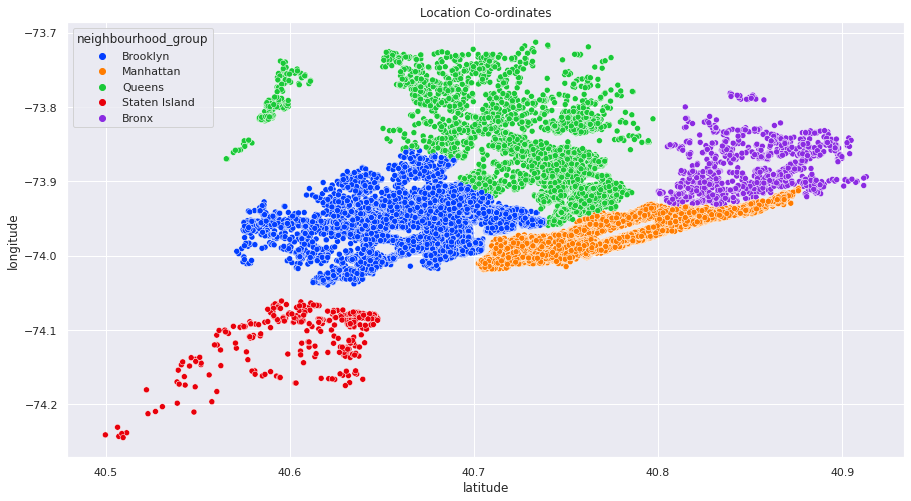

In [232]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = 'latitude',y = 'longitude',data = df_airbnb, hue ='neighbourhood_group',palette='bright' )
ax.set_title('Location Co-ordinates')


In [233]:
from skimage.io import imread

In [234]:
# plt.figure(figsize=(10,7))
# img=imread('/content/drive/MyDrive/AlmaBetter/Capstone Project/1200px-New_York_City_District_Map.png')
# plt.imshow(img,zorder=0,extent=[df_airbnb['longitude'].min(),df_airbnb['longitude'].max(),df_airbnb['latitude'].min(),df_airbnb['latitude'].max()])
# ax = plt.gca()
# df_airbnb.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
#                   cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
# plt.legend()
# plt.show()


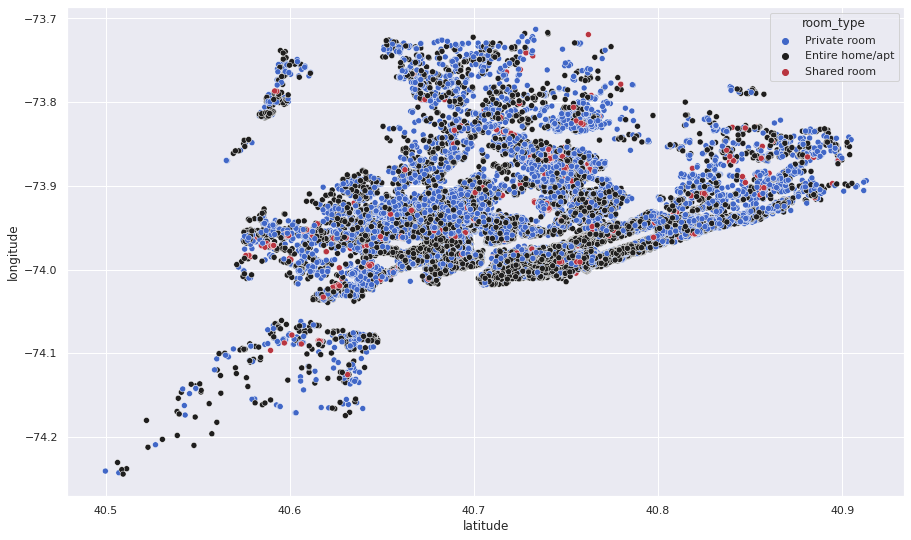

In [235]:
plt.figure(figsize=(15,9))
sns.scatterplot(x = df_airbnb['latitude'],y = df_airbnb['longitude'],hue = df_airbnb['room_type'],palette ="icefire")

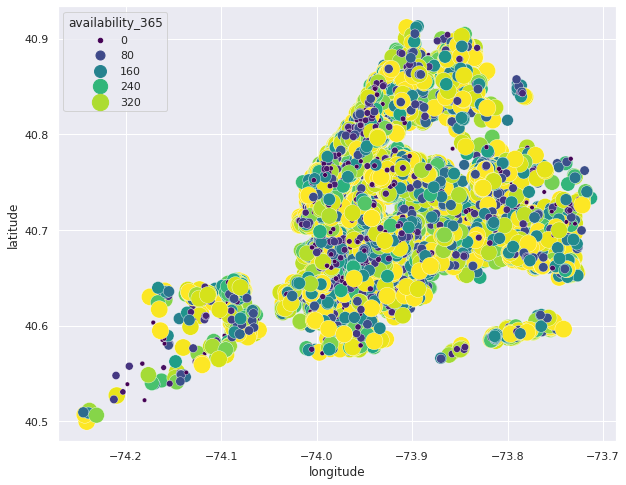

In [236]:
f, ax = plt.subplots(figsize=(10, 8))
ax=sns.scatterplot(data=df_airbnb,x='longitude', y='latitude', hue="availability_365",palette="viridis",size='availability_365',
    sizes=(20,300))

Also, looks **Bronx** & **Staten Island** has listings which are mostly available throughout the year, might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

I've reached almost the end of the analysis. There might be few analysis which can be done more. <br>

We philosophied about the variables, we analysed 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

End of project
